# Word Frequency Analysis of Jane Eyre

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
import matplotlib as plt

## Requesting Jane Eyre from Project Gutenberg

In [2]:
url = "https://www.gutenberg.org/files/1260/1260-h/1260-h.htm"

#Getting the Jane Eyre url
r = requests.get(url)
#Setting the correct text encoding of the html page
r.encoding ='utf-8'

#Extracting html from the request file
html=r.text
print(html[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Jane Eyre, by Charlotte Brontë</title>

<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for


## Extracting text from html

In [10]:
soup = BeautifulSoup(html)
text= soup.get_text()
print(text[6000:7000])

t my claim to the title of novelist rests on this one work alone. If,
therefore, the authorship of other works of fiction has been attributed to me,
an honour is awarded where it is not merited; and consequently, denied where it
is justly due.


This explanation will serve to rectify mistakes which may already have been
made, and to prevent future errors.


CURRER BELL.


April 13th, 1848.



CHAPTER I

There was no possibility of taking a walk that day. We had been wandering,
indeed, in the leafless shrubbery an hour in the morning; but since dinner
(Mrs. Reed, when there was no company, dined early) the cold winter wind had
brought with it clouds so sombre, and a rain so penetrating, that further
outdoor exercise was now out of the question.


I was glad of it: I never liked long walks, especially on chilly afternoons:
dreadful to me was the coming home in the raw twilight, with nipped fingers and
toes, and a heart saddened by the chidings of Bessie, the nurse, and


## Text preprocessing

In [16]:
from nltk.tokenize import RegexpTokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+') #remove all whitespace and punctuation
tokens=tokenizer.tokenize(text)

print(tokens[1000:1200])

['EYRE', 'CURRER', 'BELL', 'December', '21st', '1847', 'NOTE', 'TO', 'THE', 'THIRD', 'EDITION', 'I', 'avail', 'myself', 'of', 'the', 'opportunity', 'which', 'a', 'third', 'edition', 'of', 'Jane', 'Eyre', 'affords', 'me', 'of', 'again', 'addressing', 'a', 'word', 'to', 'the', 'Public', 'to', 'explain', 'that', 'my', 'claim', 'to', 'the', 'title', 'of', 'novelist', 'rests', 'on', 'this', 'one', 'work', 'alone', 'If', 'therefore', 'the', 'authorship', 'of', 'other', 'works', 'of', 'fiction', 'has', 'been', 'attributed', 'to', 'me', 'an', 'honour', 'is', 'awarded', 'where', 'it', 'is', 'not', 'merited', 'and', 'consequently', 'denied', 'where', 'it', 'is', 'justly', 'due', 'This', 'explanation', 'will', 'serve', 'to', 'rectify', 'mistakes', 'which', 'may', 'already', 'have', 'been', 'made', 'and', 'to', 'prevent', 'future', 'errors', 'CURRER', 'BELL', 'April', '13th', '1848', 'CHAPTER', 'I', 'There', 'was', 'no', 'possibility', 'of', 'taking', 'a', 'walk', 'that', 'day', 'We', 'had', 'been

In [17]:
#Lowercase words

words=[]

for word in tokens:
    words.append(word.lower())
    
print(words[1000:1200])

['eyre', 'currer', 'bell', 'december', '21st', '1847', 'note', 'to', 'the', 'third', 'edition', 'i', 'avail', 'myself', 'of', 'the', 'opportunity', 'which', 'a', 'third', 'edition', 'of', 'jane', 'eyre', 'affords', 'me', 'of', 'again', 'addressing', 'a', 'word', 'to', 'the', 'public', 'to', 'explain', 'that', 'my', 'claim', 'to', 'the', 'title', 'of', 'novelist', 'rests', 'on', 'this', 'one', 'work', 'alone', 'if', 'therefore', 'the', 'authorship', 'of', 'other', 'works', 'of', 'fiction', 'has', 'been', 'attributed', 'to', 'me', 'an', 'honour', 'is', 'awarded', 'where', 'it', 'is', 'not', 'merited', 'and', 'consequently', 'denied', 'where', 'it', 'is', 'justly', 'due', 'this', 'explanation', 'will', 'serve', 'to', 'rectify', 'mistakes', 'which', 'may', 'already', 'have', 'been', 'made', 'and', 'to', 'prevent', 'future', 'errors', 'currer', 'bell', 'april', '13th', '1848', 'chapter', 'i', 'there', 'was', 'no', 'possibility', 'of', 'taking', 'a', 'walk', 'that', 'day', 'we', 'had', 'been

## Removing stop words

In [18]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

new_words = []
for word in words:
    if word not in sw:
        new_words.append(word)
        
print(new_words[1000:1200])

['sit', 'got', 'mrs', 'reed', 'lace', 'frills', 'crimped', 'nightcap', 'borders', 'fed', 'eager', 'attention', 'passages', 'love', 'adventure', 'taken', 'old', 'fairy', 'tales', 'ballads', 'later', 'period', 'discovered', 'pages', 'pamela', 'henry', 'earl', 'moreland', 'bewick', 'knee', 'happy', 'happy', 'least', 'way', 'feared', 'nothing', 'interruption', 'came', 'soon', 'breakfast', 'room', 'door', 'opened', 'boh', 'madam', 'mope', 'cried', 'voice', 'john', 'reed', 'paused', 'found', 'room', 'apparently', 'empty', 'dickens', 'continued', 'lizzy', 'georgy', 'calling', 'sisters', 'joan', 'tell', 'mama', 'run', 'rain', 'bad', 'animal', 'well', 'drew', 'curtain', 'thought', 'wished', 'fervently', 'might', 'discover', 'hiding', 'place', 'would', 'john', 'reed', 'found', 'quick', 'either', 'vision', 'conception', 'eliza', 'put', 'head', 'door', 'said', 'window', 'seat', 'sure', 'jack', 'came', 'immediately', 'trembled', 'idea', 'dragged', 'forth', 'said', 'jack', 'want', 'asked', 'awkward'

## Word Frequency Distribution plot

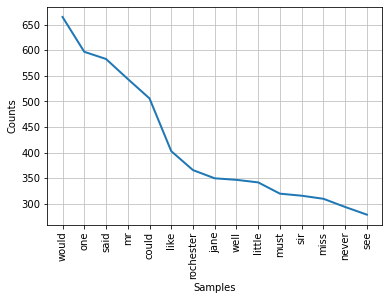

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
%matplotlib inline

freqdist = nltk.FreqDist(new_words)
freqdist.plot(15)